<a href="https://colab.research.google.com/github/0joseDark/0joseDark/blob/main/C%C3%B3pia_de_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# load the fashion mnist dataset from keras
fashion_mnist = keras.datasets.fashion_mnist
(train_X, train_y),(test_X,test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# data preprocessing, scaling values from 0-255 to 0-1
train_X = train_X/255.0
test_X = test_X/255.0

In [ ]:
# build the layers of the neural network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# set up model optimizer, loss function, and accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# train the model on training data
model.fit(train_X, train_y, epochs=12)

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5034 - accuracy: 0.8223
Epoch 2/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3753 - accuracy: 0.8652
Epoch 3/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3358 - accuracy: 0.8776
Epoch 4/12
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3114 - accuracy: 0.8864
Epoch 5/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2929 - accuracy: 0.8925
Epoch 6/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2792 - accuracy: 0.8960
Epoch 7/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2673 - accuracy: 0.9006
Epoch 8/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2568 - accuracy: 0.9040
Epoch 9/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2477 - accuracy: 0.9080
Epoch 10/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2384 - accurac

In [ ]:
# test the model on testing data
loss, acc = model.evaluate(test_X, test_y, verbose = 1)
print('\nTest accuracy: ', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8832

Test accuracy:  0.8831999897956848


In [ ]:
# show an object photo and label
def show_photo(i):
  plt.figure(figsize=(6,6))
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_X[i], cmap=plt.cm.binary) # makes the colour grey
  plt.xlabel(class_names[test_y[i]])
  plt.show()

# assign each numerical label to its English equivalent
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# compare the model prediction and the actual classification
def classify(a):
  predictions = model.predict(test_X)
  numero = np.argmax(predictions[a])
  print('')
  print('Model predicts this is a : '+ class_names[numero])

  print("\nHere's what it actually is: ")
  show_photo(a)

  if numero == test_y[a]:
    print('Looks like the prediction was right. :)')
  else:
    print('Looks like the prediction was wrong. :(')

Please enter an integer between 1 and 10 000 (inclusive):
3
313/313 [==============================] - 1s 2ms/step

Model predicts this is a : Trouser

Here's what it actually is: 


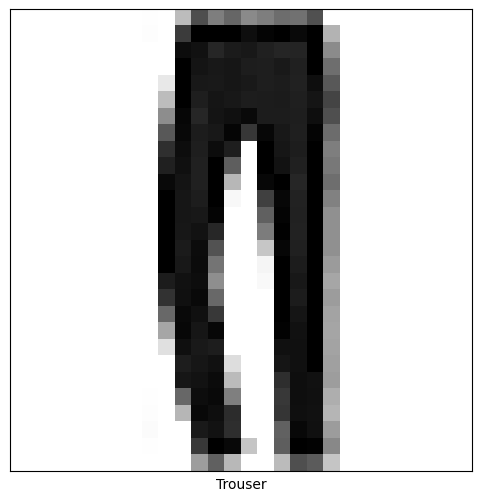

Looks like the prediction was right. :)


In [ ]:
# anyone can test out the accuracy of the model
print('Please enter an integer between 1 and 10 000 (inclusive):')

while True:
  try:
    x = int(input())-1
  except ValueError:
    print("That is not an integer.")
    continue
  if x>=0 and x<10000:
    classify(x)
    break
  else:
    print('You did not enter an integer between 1 and 10 000. Please try again.')
    continue

